In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

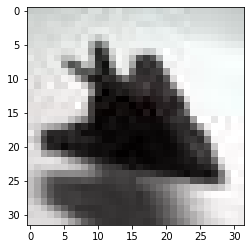

In [2]:
datadir = 'E:/cvpr/CIFAR-10-images-master/train'
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for cl in classes:
    path = os.path.join(datadir, cl)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

In [3]:
img_array.shape

(32, 32, 3)

In [4]:
training_data = []
def create_training_data():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                training_data.append([img_array, cls_num])
            except Exception as e:
                pass

In [5]:
create_training_data()
len(training_data)

50000

In [6]:
x_train = []
y_train = []

for pic, label in training_data:
    x_train.append(pic)
    y_train.append(label)

In [7]:
datadir = 'E:/cvpr/CIFAR-10-images-master/test'



test_data = []
def create_test_data():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                test_data.append([img_array, cls_num])
            except Exception as e:
                pass
                


In [8]:
create_test_data()
len(test_data)

10000

In [9]:
x_test = []
y_test = []

for pic, label in test_data:
    x_test.append(pic)
    y_test.append(label)

In [10]:
X_train=np.array(x_train)
y_train=np.array(y_train)
X_test=np.array(x_test)
y_test=np.array(y_test)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


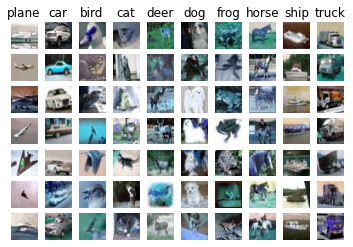

In [11]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [12]:
# Memory error prevention by subsampling data

num_training = 50000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 10000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [13]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


In [14]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=0
k=0
k_choices=[]
k_to_accuracies=[]
for i in range(1,21):
    n_neighbors+=1
    k+=1
    print("Value of K----->", n_neighbors)
    knn=KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,y_train)
    y_pred_knn=knn.predict(X_test)
    y_pred_knn
    accuracy=accuracy_score(y_pred_knn,y_test)
    k_choices.append(k)
    k_to_accuracies.append(accuracy)
    
    print("Accuracy is----->", accuracy)
    
    

Value of K-----> 1
Accuracy is-----> 0.353
Value of K-----> 2
Accuracy is-----> 0.3123
Value of K-----> 3
Accuracy is-----> 0.329
Value of K-----> 4
Accuracy is-----> 0.3386
Value of K-----> 5
Accuracy is-----> 0.3395
Value of K-----> 6
Accuracy is-----> 0.3407
Value of K-----> 7
Accuracy is-----> 0.3359
Value of K-----> 8
Accuracy is-----> 0.341
Value of K-----> 9
Accuracy is-----> 0.3381
Value of K-----> 10
Accuracy is-----> 0.3408
Value of K-----> 11
Accuracy is-----> 0.3412
Value of K-----> 12
Accuracy is-----> 0.3416
Value of K-----> 13
Accuracy is-----> 0.342
Value of K-----> 14
Accuracy is-----> 0.3422
Value of K-----> 15
Accuracy is-----> 0.3405
Value of K-----> 16
Accuracy is-----> 0.34
Value of K-----> 17
Accuracy is-----> 0.342
Value of K-----> 18
Accuracy is-----> 0.3395
Value of K-----> 19
Accuracy is-----> 0.3413
Value of K-----> 20
Accuracy is-----> 0.3392


In [15]:
accuracy_score(y_pred_knn,y_test)

0.3392

In [16]:
for x in range(len(k_choices)):
    print (k_choices[x])
    
for x in range(len(k_to_accuracies)):
    print (k_to_accuracies[x])
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
0.353
0.3123
0.329
0.3386
0.3395
0.3407
0.3359
0.341
0.3381
0.3408
0.3412
0.3416
0.342
0.3422
0.3405
0.34
0.342
0.3395
0.3413
0.3392


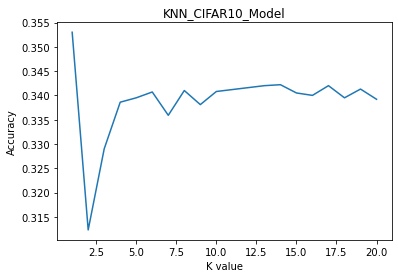

In [17]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values of K
x = k_choices
# y axis values of accuracy
y = k_to_accuracies
 
# plotting the k values and accuracy
plt.plot(x, y)
 
# x axis as K values
plt.xlabel('K value')
# y axis as accuracy
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('KNN_CIFAR10_Model')
 
# function to show the plot
plt.show()

#Here we applied the KNN algorithm and used the KNN classifier to classify the CIFAR10 dataset. Our target was to find the accuracy for every corresponding K value. We consider K values from 1 to 20. So, for the 1 to 20 values of K, we found the corresponding accuracy of the model, which was performed on the supplied test set of the CIFAR10 dataset. We found the acuracy and plotted it against the k values. We found very low accuracy, around 30%, and a little bit more than that, like 33%, or sometimes 34%.The highest accuracy was 35%. which is very low accuracy for a model.

From the plotting of the k values and corresponding accuracy, we see that accuracy varies from around 30% to 35%. Again, it is proven to be low accuracy.

So now we want to figure out why the accuracy is so low. First of all, we need to remember that this CIFAR10 dataset is an image dataset containing rgb images. So, a neural network would have been perfect for getting higher accuracy. Because image datasets will provide higher accuracy if we use neural networks, since neural networks work and learn patterns with different layers of neurons and have more capability to classify images from different positions.

But, the classical machine learning approach follows a geometrical approach to classify the images. But that doesn't help to classify images very well, and as a result, we get very low accuracy.

So, finally, it can be stated that for any kind of image classification, we need to use neural networks instead of using a machine learning approach to get higher accuracy and better results.